# Optimizing Supply Chain Management Using Supervised Regression

The project on supply chain management using supervised regression aims to enhance operational efficiency and decision-making within a warehouse network. Leveraging regression models, the system predicts and optimizes various aspects of the supply chain, such as storage issues, transportation issues and resource utilization. By analyzing historical data on warehouse characteristics, location types, capacity sizes, and other relevant factors, the model provides valuable insights into key performance indicators. This predictive approach enables proactive decision-making, allowing for better resource utilization, reducing transport issues, and ultimately improving the overall performance of the supply chain.
                          
The aim of this project is to build a model, using historical data that will determine an optimum weight of the product to be shipped each time from the respective warehouse.The project begins with data exploration and cleaning, and then, proceeds to model building, followed by checking relationship between the columns and data preprocessing.

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [2]:
# Loading training Dataset
train_df = pd .read_csv("supply_train.csv")
train_df.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [3]:
# Loading Testing Dataset
test_df = pd.read_csv("supply_test.csv")
test_df.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071


# Data Exploration And Cleaning

Training Data

In [4]:
train_df.shape

(16620, 25)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

In [6]:
# Dropping unnamed column
train_df=train_df.drop( ['Unnamed: 0'] ,axis =1)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 16620 non-null  object 
 1   WH_Manager_ID                 16620 non-null  object 
 2   Location_type                 16620 non-null  object 
 3   WH_capacity_size              16620 non-null  object 
 4   zone                          16620 non-null  object 
 5   WH_regional_zone              16620 non-null  object 
 6   num_refill_req_l3m            16620 non-null  int64  
 7   transport_issue_l1y           16620 non-null  int64  
 8   Competitor_in_mkt             16620 non-null  int64  
 9   retail_shop_num               16620 non-null  int64  
 10  wh_owner_type                 16620 non-null  object 
 11  distributor_num               16620 non-null  int64  
 12  flood_impacted                16620 non-null  int64  
 13  f

In [8]:
# Finding Null values
train_df.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [9]:
# Removing Null Values
train_df['wh_est_year']=train_df['wh_est_year'].replace(to_replace=np.NaN,value=0)

In [10]:
train_df['wh_est_year'].isnull().sum()

0

In [11]:
train_df['approved_wh_govt_certificate']=train_df['approved_wh_govt_certificate'].replace(to_replace=np.NaN,value='Not approved')

In [12]:
train_df['approved_wh_govt_certificate'].isnull().sum()

0

In [13]:
train_df['workers_num'].mean()

28.911490001880523

In [14]:
train_df['workers_num']=train_df['workers_num'].replace(to_replace=np.NaN,value=28)

In [15]:
train_df['workers_num'].isnull().sum()

0

In [16]:
train_df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.874910,1059.077316,17.127196,0.306137,3.491095,18.727377,22098.420096
std,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.685148,1003.243662,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,0.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,1998.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2010.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


Testing Data

In [17]:
test_df.shape

(5529, 25)

In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5529 non-null   int64  
 1   Ware_house_ID                 5529 non-null   object 
 2   WH_Manager_ID                 5529 non-null   object 
 3   Location_type                 5529 non-null   object 
 4   WH_capacity_size              5529 non-null   object 
 5   zone                          5529 non-null   object 
 6   WH_regional_zone              5529 non-null   object 
 7   num_refill_req_l3m            5529 non-null   int64  
 8   transport_issue_l1y           5529 non-null   int64  
 9   Competitor_in_mkt             5529 non-null   int64  
 10  retail_shop_num               5529 non-null   int64  
 11  wh_owner_type                 5529 non-null   object 
 12  distributor_num               5529 non-null   int64  
 13  flo

In [19]:
# Dropping unnamed column
test_df=test_df.drop( ['Unnamed: 0'] ,axis =1)

In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 5529 non-null   object 
 1   WH_Manager_ID                 5529 non-null   object 
 2   Location_type                 5529 non-null   object 
 3   WH_capacity_size              5529 non-null   object 
 4   zone                          5529 non-null   object 
 5   WH_regional_zone              5529 non-null   object 
 6   num_refill_req_l3m            5529 non-null   int64  
 7   transport_issue_l1y           5529 non-null   int64  
 8   Competitor_in_mkt             5529 non-null   int64  
 9   retail_shop_num               5529 non-null   int64  
 10  wh_owner_type                 5529 non-null   object 
 11  distributor_num               5529 non-null   int64  
 12  flood_impacted                5529 non-null   int64  
 13  flo

In [21]:
# Finding Null values
test_df.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [22]:
# Removing Null Values
test_df['wh_est_year']=test_df['wh_est_year'].replace(to_replace=np.NaN,value=0)

In [23]:
test_df['wh_est_year'].isnull().sum()

0

In [24]:
test_df['approved_wh_govt_certificate']=test_df['approved_wh_govt_certificate'].replace(to_replace=np.NaN,value='Not approved')

In [25]:
test_df['approved_wh_govt_certificate'].isnull().sum()

0

In [26]:
test_df['workers_num'].mean()

29.010528294792255

In [27]:
test_df['workers_num']=test_df['workers_num'].replace(to_replace=np.NaN,value=29)

In [28]:
test_df['workers_num'].isnull().sum()

0

In [29]:
test_df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000
mean,4.007235,0.765600,3.106167,4980.695424,42.128052,0.104178,0.049919,0.657262,163.899982,29.010128,1033.681498,17.085549,0.298426,3.477302,18.892205,22052.334599
std,2.604325,1.187567,1.128396,1049.617325,15.959934,0.305519,0.217797,0.474668,62.544704,7.697960,1004.475969,9.206551,0.457609,1.700717,8.716737,11645.738485
min,0.000000,0.000000,1.000000,1953.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4310.000000,28.000000,0.000000,0.000000,0.000000,110.000000,24.000000,0.000000,10.000000,0.000000,2.000000,11.000000,12143.000000
50%,4.000000,0.000000,3.000000,4863.000000,42.000000,0.000000,0.000000,1.000000,165.000000,28.000000,1997.000000,17.000000,0.000000,3.000000,21.000000,22099.000000
75%,6.000000,1.000000,4.000000,5492.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2010.000000,24.000000,1.000000,5.000000,26.000000,30099.000000
max,8.000000,5.000000,9.000000,10846.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55144.000000


# checking relationship between each columns

In [30]:
# train dataset
new_train_data = train_df.select_dtypes(include=['number'])
corr_train_data = new_train_data.corr()
corr_train_data

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
num_refill_req_l3m,1.000000,0.023180,0.019149,-0.005090,0.001944,-0.015214,-0.006015,0.001104,-0.000909,-0.013827,0.554454,-0.008875,0.256853,0.000249,-0.008354,-0.000646
transport_issue_l1y,0.023180,1.000000,-0.010148,0.000400,0.002275,-0.009324,0.002377,-0.008770,0.009382,-0.006779,-0.295507,-0.152709,0.009052,0.014092,0.001738,-0.183150
Competitor_in_mkt,0.019149,-0.010148,1.000000,-0.155607,0.004282,0.012223,-0.004563,-0.008485,0.014434,-0.013648,0.014894,0.011957,0.016640,0.014849,-0.040299,0.010854
retail_shop_num,-0.005090,0.000400,-0.155607,1.000000,-0.005892,-0.010186,0.001207,-0.008503,-0.000910,-0.009968,0.002728,-0.008094,-0.002687,0.000558,0.038614,-0.008332
distributor_num,0.001944,0.002275,0.004282,-0.005892,1.000000,0.008627,-0.009270,0.001878,-0.005771,-0.009437,0.005783,-0.000539,0.003390,-0.003420,-0.003020,0.001435
flood_impacted,-0.015214,-0.009324,0.012223,-0.010186,0.008627,1.000000,0.114835,0.168812,0.013265,0.148482,-0.009605,-0.001571,-0.010540,0.000643,0.000730,-0.000507
flood_proof,-0.006015,0.002377,-0.004563,0.001207,-0.009270,0.114835,1.000000,0.118690,-0.003997,0.044652,-0.013996,-0.004752,0.005102,-0.004836,-0.009568,-0.003862
electric_supply,0.001104,-0.008770,-0.008485,-0.008503,0.001878,0.168812,0.118690,1.000000,-0.000506,0.331202,-0.008635,-0.000652,-0.003375,-0.015071,-0.005347,-0.001533
dist_from_hub,-0.000909,0.009382,0.014434,-0.000910,-0.005771,0.013265,-0.003997,-0.000506,1.000000,-0.013023,-0.000527,-0.011496,0.002281,0.002410,0.003403,-0.011380
workers_num,-0.013827,-0.006779,-0.013648,-0.009968,-0.009437,0.148482,0.044652,0.331202,-0.013023,1.000000,-0.011284,-0.005700,0.002896,-0.012389,-0.009073,-0.005446


<function matplotlib.pyplot.show(close=None, block=None)>

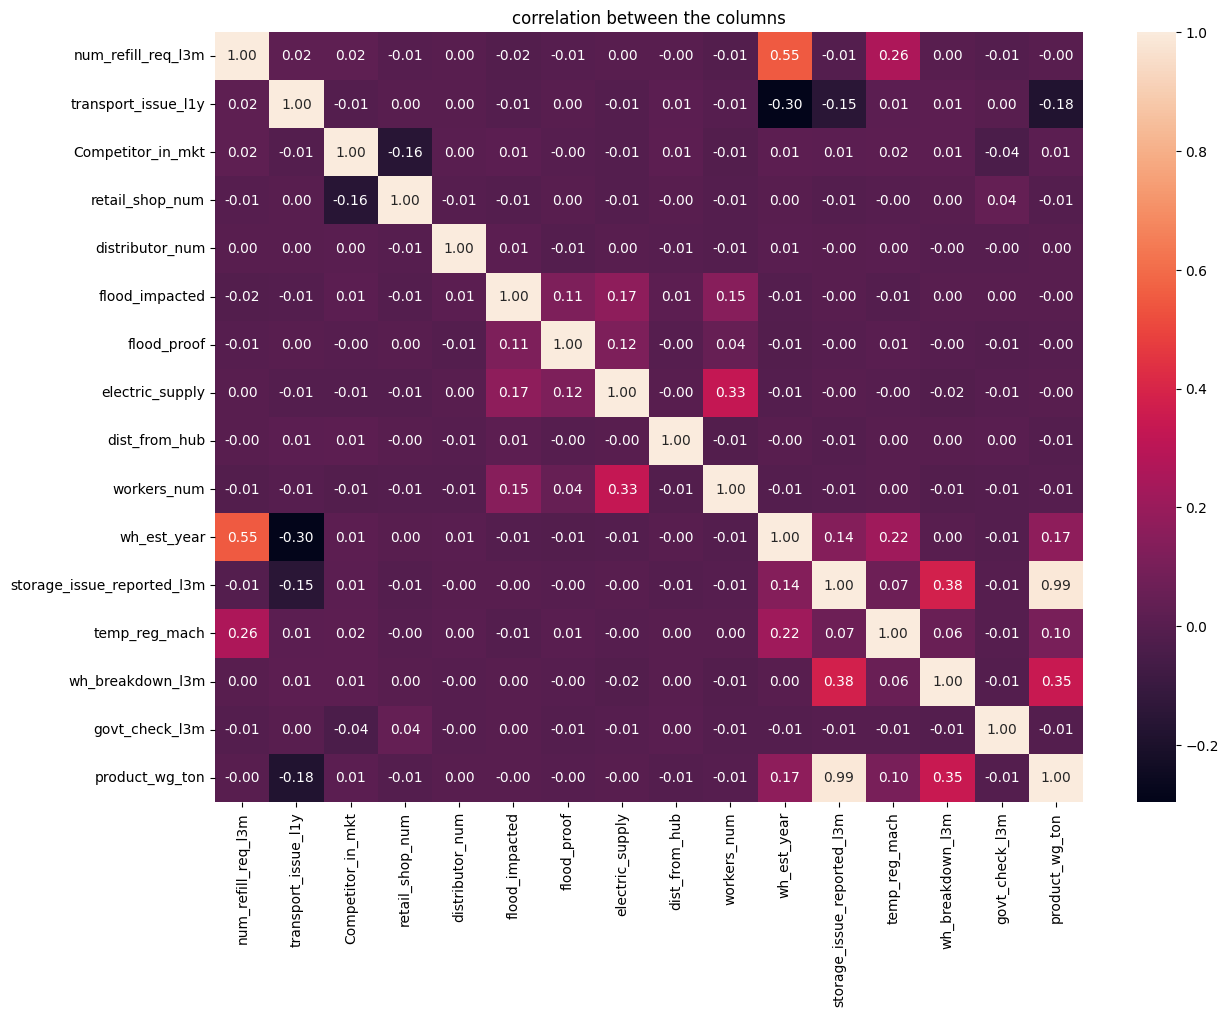

In [31]:
plt.figure(figsize=(14,10))
sns.heatmap(corr_train_data,annot=True,fmt = '.2f')
plt.title("correlation between the columns")
plt.show

The correlation matrix provided reveals relationships between various features in the dataset. Let's delve into the notable correlations:

Positive Correlations:

Product Weight and Storage Issues Reported (0.99): There is an exceptionally strong positive correlation between the weight of the product and the number of storage issues reported in the last three months. This indicates that heavier products are associated with a higher incidence of reported storage issues.

Storage Issues Reported and warehouse breakdown(0.38): There is a positive correlation between the storage Issues Reported and warehouse breakdown . This implies that, on average,number of warehouse breakdown leads to more storage issues.

Product Weight and warehouse breakdown(0.35): There is an exceptionally strong positive correlation between the weight of the product and the number of  warehouse breakdown reported . This indicates that heavier products are associated with a higher incidence of reported warehouse breakdown.

Warehouse Establishment Year and Number of Refill Requests (0.55): There is a moderately strong positive correlation between the establishment year of a warehouse and the number of refill requests in the last three months. This suggests that, on average, warehouses established more recently tend to receive a higher number of refill requests.

Negative Correlations:

Transport Issues in the Last Year and Warehouse Establishment Year (-0.30): There is a moderate negative correlation between the number of transport issues a warehouse faced in the last year and the establishment year of the warehouse. This suggests that, generally, warehouses facing fewer transport issues are more established.

Transport Issues in the Last Year and Storage Issues Reported (-0.15): There is a moderate negative correlation between the number of storage issues a warehouse faced in the last year and the transport Issues Reported. This suggests that, generally, warehouses facing fewer storage when there is high transport issues .

Product Weight and Transport Issues in the Last Year(-0.18) : There is a moderate negative correlation between the weight of the product and the number of transport issues reported in the last year. This indicates that high transport issues are associated with a lower products.


Other Observations:

The correlations between other variables seem to be relatively weak (close to zero), indicating a limited linear relationship.
Understanding these correlations provides insights into potential interdependencies between different factors in the supply chain. For instance, the positive correlation between product weight and storage issues suggests that warehouses dealing with heavier products might need to pay extra attention to storage conditions. Similarly, the negative correlation between transport issues and warehouse establishment year implies that more established warehouses might have optimized transport processes.

In [32]:
# test dataset
new_test_data = test_df.select_dtypes(include=['number'])
corr_test_data = new_test_data.corr()
corr_test_data

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
num_refill_req_l3m,1.000000,0.010726,-0.025807,0.008033,0.013944,-0.011860,-0.001912,-0.031797,0.000739,-0.012772,0.574113,-0.004326,0.283704,0.001385,0.000297,0.004579
transport_issue_l1y,0.010726,1.000000,-0.002755,0.004305,0.015461,0.001503,0.005382,-0.002628,0.027955,-0.018222,-0.260507,-0.125267,0.024220,0.004262,0.019944,-0.153225
Competitor_in_mkt,-0.025807,-0.002755,1.000000,-0.152577,-0.009454,-0.000605,-0.003903,0.023367,-0.002018,0.025158,-0.000256,-0.005384,-0.004616,0.005356,-0.051344,-0.003569
retail_shop_num,0.008033,0.004305,-0.152577,1.000000,0.000121,0.008927,0.014930,-0.001647,0.010769,0.000716,-0.007541,-0.003898,0.006270,-0.024470,0.058427,-0.002137
distributor_num,0.013944,0.015461,-0.009454,0.000121,1.000000,0.006538,0.003573,-0.008867,-0.012906,-0.027583,-0.001373,0.014828,0.005715,0.017875,-0.014819,0.016267
flood_impacted,-0.011860,0.001503,-0.000605,0.008927,0.006538,1.000000,0.082229,0.163929,-0.016845,0.181074,-0.015723,-0.019633,-0.015389,-0.001715,-0.007126,-0.018211
flood_proof,-0.001912,0.005382,-0.003903,0.014930,0.003573,0.082229,1.000000,0.106031,-0.000523,0.011999,-0.008286,-0.006190,0.001151,-0.017940,0.000643,-0.002733
electric_supply,-0.031797,-0.002628,0.023367,-0.001647,-0.008867,0.163929,0.106031,1.000000,-0.007303,0.346509,-0.028528,-0.001403,-0.015392,-0.004149,-0.013478,0.001644
dist_from_hub,0.000739,0.027955,-0.002018,0.010769,-0.012906,-0.016845,-0.000523,-0.007303,1.000000,-0.020225,0.003667,0.008330,-0.006251,-0.001743,0.000477,0.009994
workers_num,-0.012772,-0.018222,0.025158,0.000716,-0.027583,0.181074,0.011999,0.346509,-0.020225,1.000000,-0.015997,-0.016054,-0.006148,-0.041877,0.008112,-0.012889


<function matplotlib.pyplot.show(close=None, block=None)>

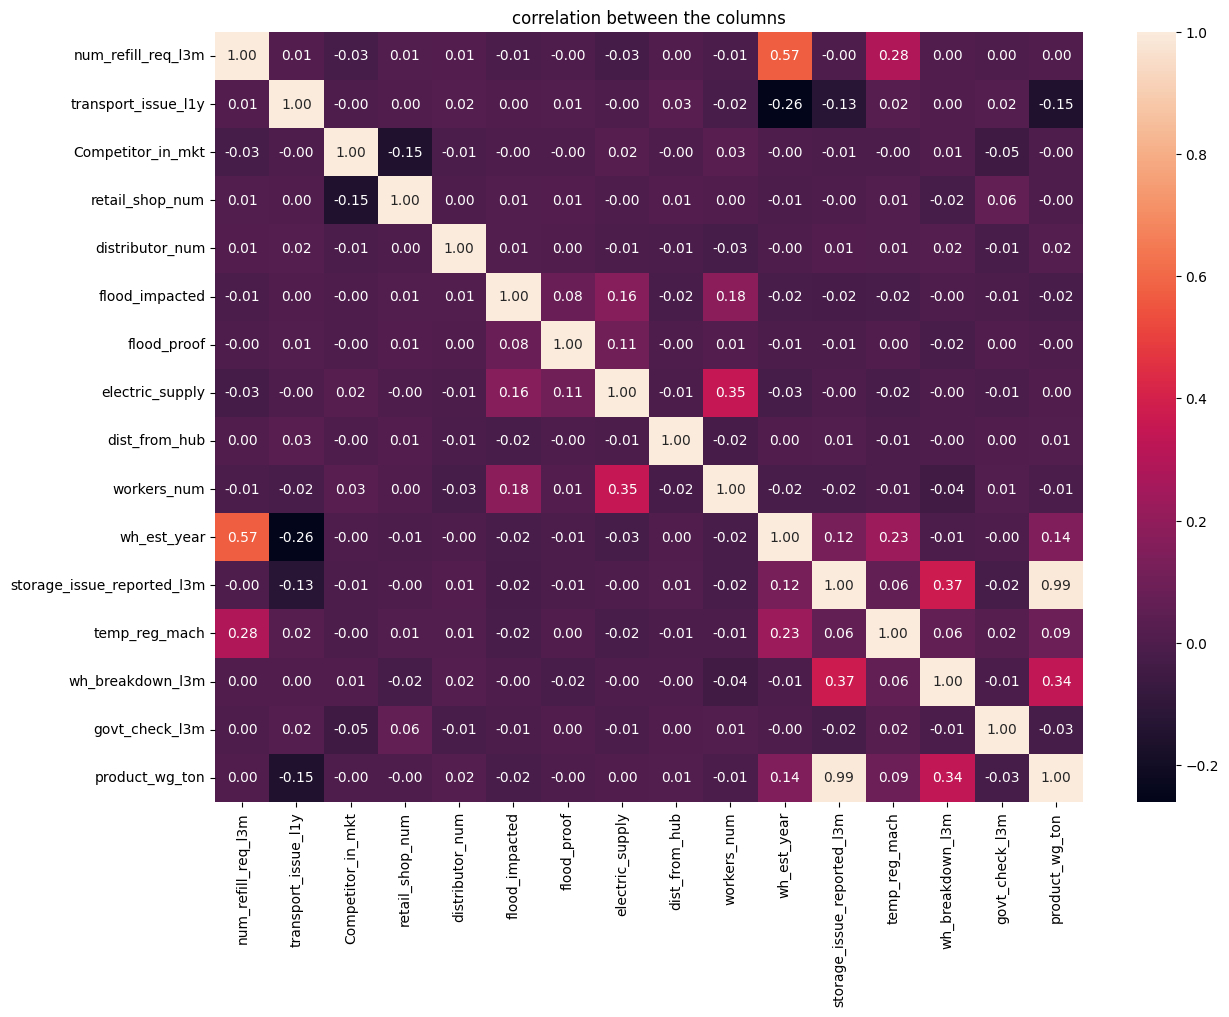

In [33]:
plt.figure(figsize=(14,10))
sns.heatmap(corr_test_data,annot=True,fmt = '.2f')
plt.title("correlation between the columns")
plt.show

The correlation matrix provided reveals relationships between various features in the dataset. Let's delve into the notable correlations:

Positive Correlations:

Product Weight and Storage Issues Reported (0.99): There is an exceptionally strong positive correlation between the weight of the product and the number of storage issues reported in the last three months. This indicates that heavier products are associated with a higher incidence of reported storage issues.

Storage Issues Reported and warehouse breakdown(0.37): There is a positive correlation between the storage Issues Reported and warehouse breakdown . This implies that, on average,number of warehouse breakdown leads to more storage issues.

Product Weight and warehouse breakdown(0.34): There is an exceptionally strong positive correlation between the weight of the product and the number of  warehouse breakdown reported . This indicates that heavier products are associated with a higher incidence of reported warehouse breakdown.

Warehouse Establishment Year and Number of Refill Requests (0.57): There is a moderately strong positive correlation between the establishment year of a warehouse and the number of refill requests in the last three months. This suggests that, on average, warehouses established more recently tend to receive a higher number of refill requests.

Negative Correlations:

Transport Issues in the Last Year and Warehouse Establishment Year (-0.26): There is a moderate negative correlation between the number of transport issues a warehouse faced in the last year and the establishment year of the warehouse. This suggests that, generally, warehouses facing fewer transport issues are more established.

Transport Issues in the Last Year and Storage Issues Reported (-0.13): There is a moderate negative correlation between the number of storage issues a warehouse faced in the last year and the transport Issues Reported. This suggests that, generally, warehouses facing fewer storage when there is high transport issues .

Product Weight and Transport Issues in the Last Year(-0.15) : There is a moderate negative correlation between the weight of the product and the number of transport issues reported in the last year. This indicates that high transport issues are associated with a lower products.


Other Observations:

The correlations between other variables seem to be relatively weak (close to zero), indicating a limited linear relationship.
Understanding these correlations provides insights into potential interdependencies between different factors in the supply chain. For instance, the positive correlation between product weight and storage issues suggests that warehouses dealing with heavier products might need to pay extra attention to storage conditions. Similarly, the negative correlation between transport issues and warehouse establishment year implies that more established warehouses might have optimized transport processes.

<function matplotlib.pyplot.show(close=None, block=None)>

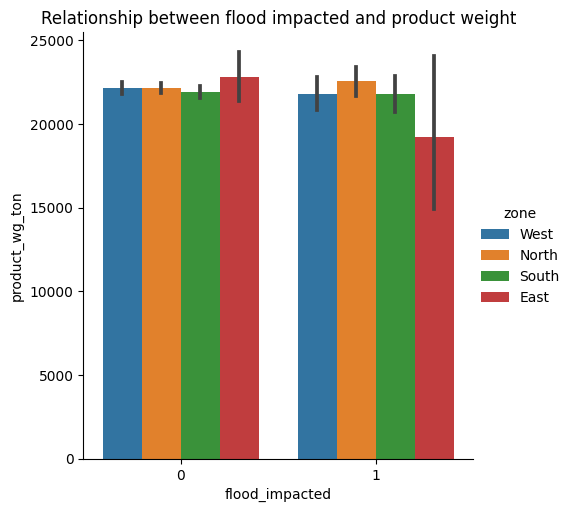

In [34]:
# relationship between flood impacted and product weight in each zone
sns.catplot(x='flood_impacted',y='product_wg_ton' ,data=train_df,kind= 'bar',hue='zone')
plt.title('Relationship between flood impacted and product weight')
plt.show

In [35]:
#  relationship between transport issue and product weight in each zone
transport_df=train_df.groupby(['transport_issue_l1y','zone','product_wg_ton'],as_index=False).count()
transport_df


,transport_issue_l1y,zone,product_wg_ton,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,WH_regional_zone,num_refill_req_l3m,Competitor_in_mkt,...,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,0,East,4106,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,0,East,5060,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,0,East,5067,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,0,East,5104,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,East,5113,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12723,5,West,31103,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
12724,5,West,32105,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
12725,5,West,32119,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
12726,5,West,33068,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


<function matplotlib.pyplot.show(close=None, block=None)>

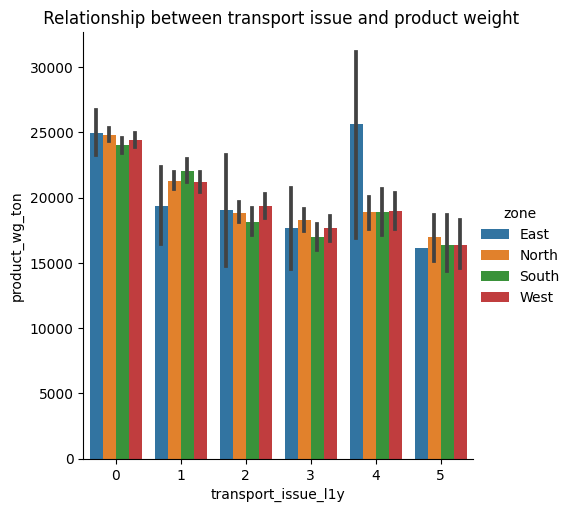

In [36]:
sns.catplot(x='transport_issue_l1y',y='product_wg_ton',hue="zone",kind="bar",data=transport_df)
plt.title(' Relationship between transport issue and product weight')
plt.show

In [37]:
#Most Supplied zone
zone_count=train_df['zone'].value_counts()
most_supplied_zone = zone_count.idxmax()
print("Most Supplied Zone : ",most_supplied_zone)


Most Supplied Zone :  North


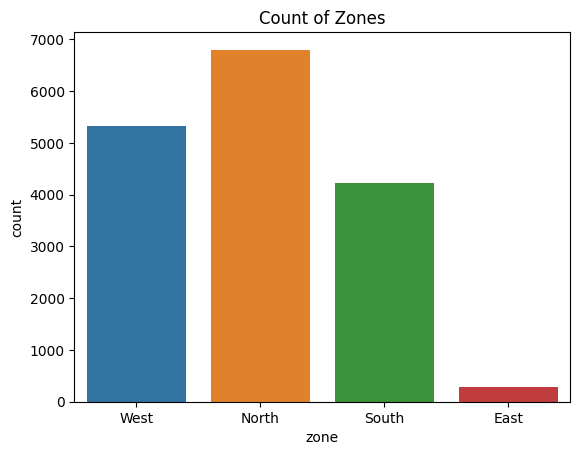

In [38]:
sns.countplot(x=train_df.zone)
plt.title("Count of Zones")
plt.show()

North zone have more number of warehouse,so we can assume that the supply is more in North zone.

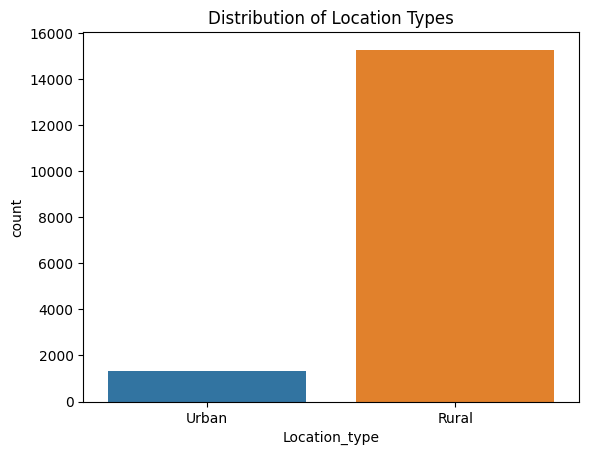

In [39]:
# Bar chart representing distribution of location types
sns.countplot(x='Location_type', data=train_df)
plt.title('Distribution of Location Types')
plt.show()

Most of the warehouse is located in Rural areas.

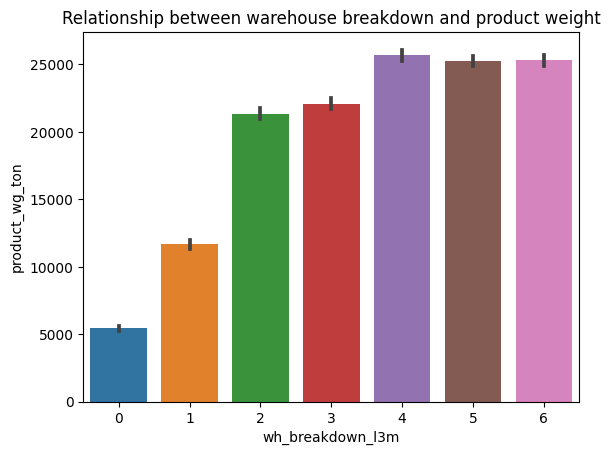

In [40]:
# relationship between warehouse breakdown and product weight
sns.barplot(x='wh_breakdown_l3m',y='product_wg_ton', data=train_df)
plt.title('Relationship between warehouse breakdown and product weight')
plt.show()

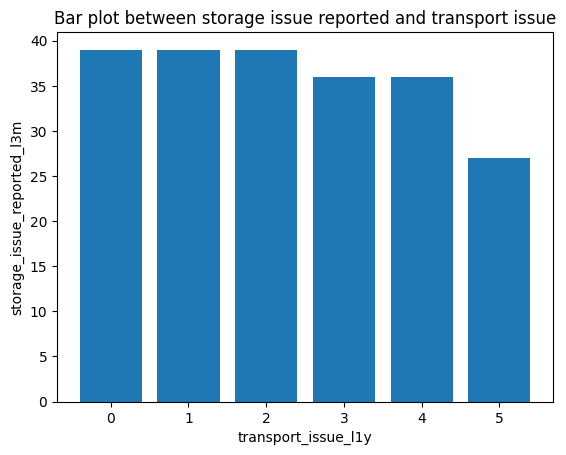

In [41]:
# Bar plot between 'storage issue reported' and 'transport issue'
plt.bar(train_df['transport_issue_l1y'], train_df['storage_issue_reported_l3m'])
plt.title('Bar plot between storage issue reported and transport issue')
plt.xlabel('transport_issue_l1y')
plt.ylabel('storage_issue_reported_l3m')
plt.show()

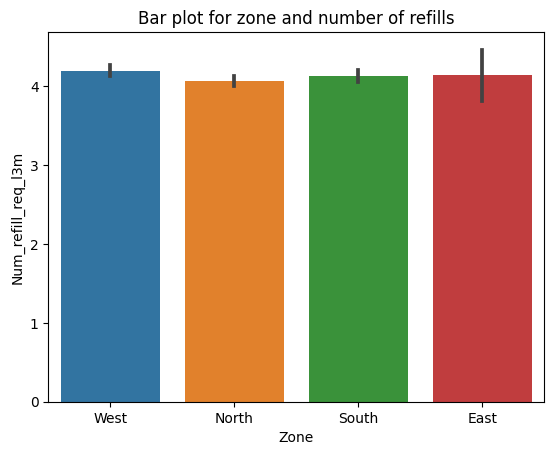

In [42]:
# Bar plot for 'zone' and 'number of refills'

sns.barplot(x='zone', y='num_refill_req_l3m', data=train_df)
plt.title('Bar plot for zone and number of refills')
plt.xlabel('Zone')
plt.ylabel('Num_refill_req_l3m')
plt.show()

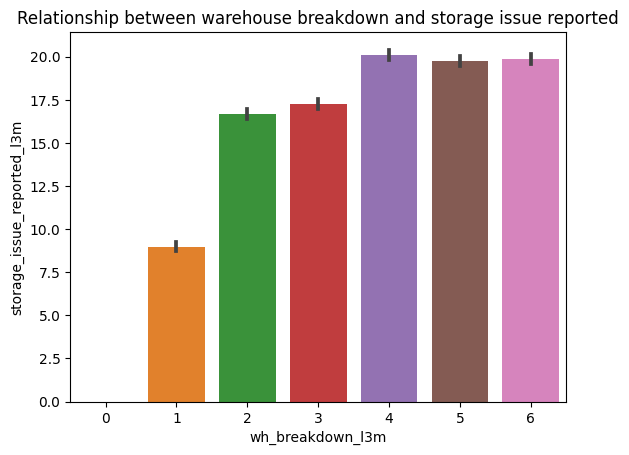

In [43]:
# relationship between warehouse breakdown and storage issue reported 
sns.barplot(x='wh_breakdown_l3m',y='storage_issue_reported_l3m', data=train_df)
plt.title('Relationship between warehouse breakdown and storage issue reported')
plt.show()

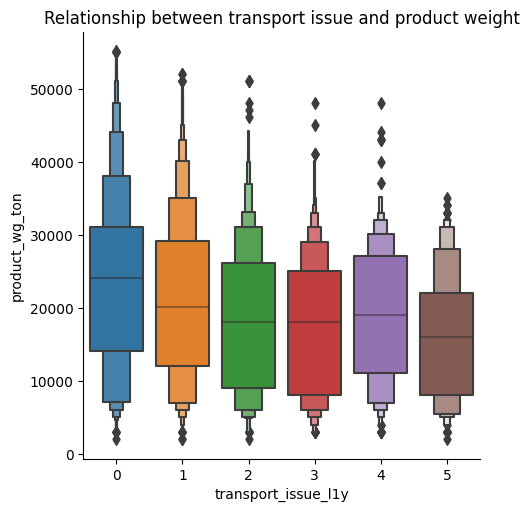

In [44]:
# relationship between transport issue and product weight
sns.catplot(x='transport_issue_l1y',y='product_wg_ton',kind="boxen",data=train_df)
plt.title('Relationship between transport issue and product weight')
plt.show()

In [45]:
# Data Mining
train_df_=train_df.loc[:,['num_refill_req_l3m','transport_issue_l1y','flood_impacted','Competitor_in_mkt','retail_shop_num','dist_from_hub','workers_num','wh_breakdown_l3m','storage_issue_reported_l3m','product_wg_ton']]

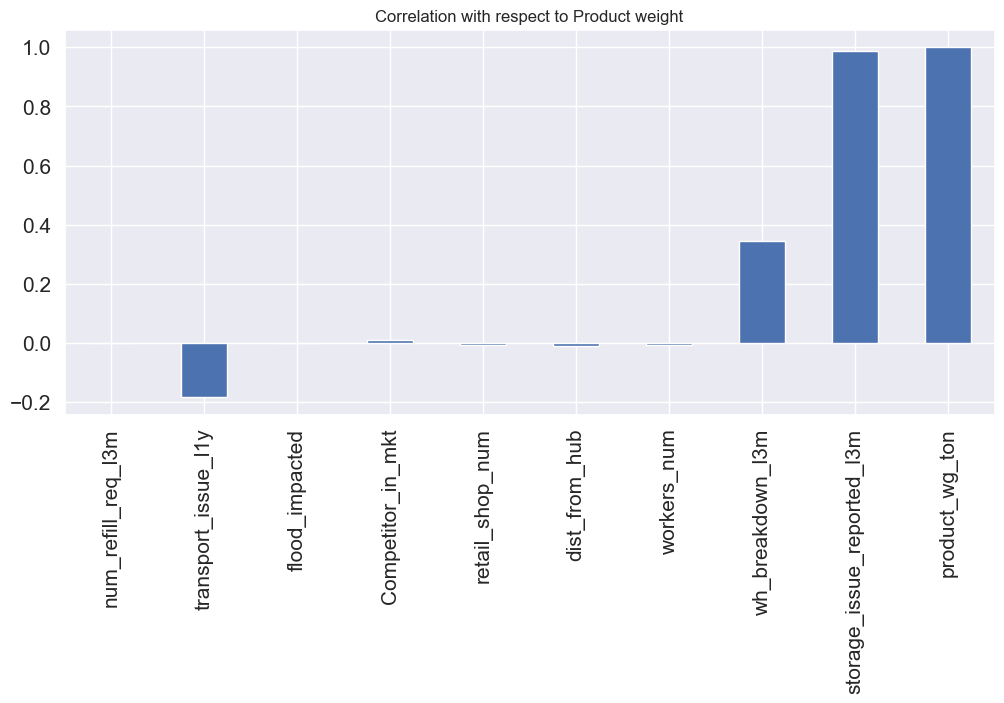

In [46]:
# Features having coorelation to product weight
sns.set(color_codes=True)
train_df_.corrwith(train_df_.product_wg_ton).plot.bar(figsize = (12, 5), title = "Correlation with respect to Product weight", fontsize = 15, rot = 90, grid = True);

C:\Users\RAMSEENA\AppData\Local\Temp\ipykernel_20192\849886591.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['product_wg_ton'], color="orange")


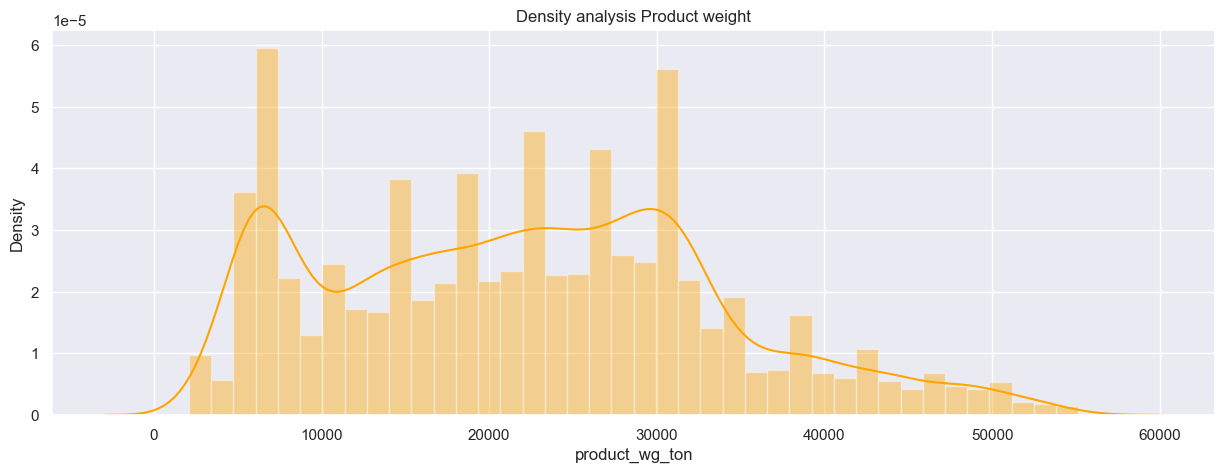

In [47]:
# Product weight Frequency Distribution 
plt.figure(figsize=(15,5))
sns.distplot(train_df['product_wg_ton'], color="orange")
plt.title("Density analysis Product weight")
plt.ylabel("Density")
plt.xlabel("product_wg_ton");

# Data Preprocessing

In [48]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor

In [49]:
#converting categorical variables to numerical values (train dataset)
cat_df=train_df.select_dtypes(include='object')
cat_df.columns


Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

In [50]:
# Removing less relevent features
train_df=train_df.drop(['WH_regional_zone','WH_Manager_ID','zone','wh_owner_type'],axis=1)
train_df.columns

Index(['Ware_house_ID', 'Location_type', 'WH_capacity_size',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [51]:
#Label Encoding Categorical variable
le=LabelEncoder()
train_df['Ware_house_ID_encoded']=le.fit_transform(train_df['Ware_house_ID'])
train_df['location encoded']=le.fit_transform(train_df['Location_type'])
train_df['WH_capacity_size encoded']=le.fit_transform(train_df['WH_capacity_size'])
train_df['encoded_wh_govt_certificate']=le.fit_transform(train_df['approved_wh_govt_certificate'])
train_df_en1=train_df.drop(['Ware_house_ID','Location_type','WH_capacity_size','approved_wh_govt_certificate'],axis=1)


In [52]:
train_df_en1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   num_refill_req_l3m           16620 non-null  int64  
 1   transport_issue_l1y          16620 non-null  int64  
 2   Competitor_in_mkt            16620 non-null  int64  
 3   retail_shop_num              16620 non-null  int64  
 4   distributor_num              16620 non-null  int64  
 5   flood_impacted               16620 non-null  int64  
 6   flood_proof                  16620 non-null  int64  
 7   electric_supply              16620 non-null  int64  
 8   dist_from_hub                16620 non-null  int64  
 9   workers_num                  16620 non-null  float64
 10  wh_est_year                  16620 non-null  float64
 11  storage_issue_reported_l3m   16620 non-null  int64  
 12  temp_reg_mach                16620 non-null  int64  
 13  wh_breakdown_l3m

In [53]:
#converting categorical variables to numerical values (test dataset)
cat_df1=test_df.select_dtypes(include='object')
cat_df1.columns


Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

In [54]:
# Removing less relevent features
test_df=test_df.drop(['WH_regional_zone','WH_Manager_ID','zone','wh_owner_type'],axis=1)
test_df.columns

Index(['Ware_house_ID', 'Location_type', 'WH_capacity_size',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [55]:
#Label Encoding Categorical variable
le=LabelEncoder()
test_df['Ware_house_ID_encoded']=le.fit_transform(test_df['Ware_house_ID'])
test_df['location encoded']=le.fit_transform(test_df['Location_type'])
test_df['WH_capacity_size encoded']=le.fit_transform(test_df['WH_capacity_size'])
test_df['encoded_wh_govt_certificate']=le.fit_transform(test_df['approved_wh_govt_certificate'])
test_df_en1=test_df.drop(['Ware_house_ID','Location_type','WH_capacity_size','approved_wh_govt_certificate'],axis=1)


In [56]:
test_df_en1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   num_refill_req_l3m           5529 non-null   int64  
 1   transport_issue_l1y          5529 non-null   int64  
 2   Competitor_in_mkt            5529 non-null   int64  
 3   retail_shop_num              5529 non-null   int64  
 4   distributor_num              5529 non-null   int64  
 5   flood_impacted               5529 non-null   int64  
 6   flood_proof                  5529 non-null   int64  
 7   electric_supply              5529 non-null   int64  
 8   dist_from_hub                5529 non-null   int64  
 9   workers_num                  5529 non-null   float64
 10  wh_est_year                  5529 non-null   float64
 11  storage_issue_reported_l3m   5529 non-null   int64  
 12  temp_reg_mach                5529 non-null   int64  
 13  wh_breakdown_l3m  

# splitting Training and Testing Dataset

In [57]:
X_train=train_df_en1.drop('product_wg_ton',axis=1)
y_train=train_df_en1['product_wg_ton']
X_test=test_df_en1.drop('product_wg_ton',axis=1)
y_test=test_df_en1['product_wg_ton']

In [58]:
X_train.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,Ware_house_ID_encoded,location encoded,WH_capacity_size encoded,encoded_wh_govt_certificate
0,3,1,2,4651,24,0,1,1,91,29.0,0.0,13,0,5,15,0,1,2,0
1,0,0,4,6217,47,0,0,1,210,31.0,0.0,4,0,3,17,1,0,0,0
2,1,0,4,4306,64,0,0,0,161,37.0,0.0,17,0,6,22,2,0,1,0
3,7,4,2,6000,50,0,0,0,103,21.0,0.0,17,1,3,27,3,0,1,1
4,3,1,2,4740,42,1,0,1,112,25.0,2009.0,18,0,6,24,4,0,0,4


In [59]:
y_train.head()

0    17115
1     5074
2    23137
3    22115
4    24071
Name: product_wg_ton, dtype: int64

In [60]:
X_test.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,Ware_house_ID_encoded,location encoded,WH_capacity_size encoded,encoded_wh_govt_certificate
0,5,0,3,5590,15,0,0,0,156,30.0,2006.0,24,0,2,5,0,0,0,0
1,5,0,2,5856,40,0,0,1,79,31.0,2019.0,5,1,2,24,1,0,0,4
2,3,0,3,4803,40,0,0,1,70,41.0,2008.0,19,1,5,9,2,0,2,1
3,5,2,2,4784,15,0,0,1,255,33.0,2017.0,9,1,3,11,3,0,1,1
4,6,0,4,3699,24,0,0,0,205,20.0,1999.0,25,0,4,26,4,1,1,2


In [61]:
y_test.head()

0    30132
1     6075
2    24076
3    13092
4    29071
Name: product_wg_ton, dtype: int64

# Machine Learning Model Development and Performance Evaluation

In [62]:
#linear regression
lr=LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [63]:
y_pred = lr.predict(X_test)
y_pred

array([31223.3302009 ,  8152.85161938, 25275.6373536 , ...,
       24262.68408316, 16106.12108172, 12788.18357344])

In [64]:
#Evaluating model's performance

mse=mean_squared_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
msa=mean_absolute_error(y_test,y_pred)
print("mean_square_error = ",mse)
print("mean_absolute_error = ",msa)
print("r2_score = ",r2score)

mean_square_error =  3075913.9744334016
mean_absolute_error =  1300.0438414998162
r2_score =  0.9773160503902987


In [65]:
#Decision Tree

dt = DecisionTreeRegressor()

dt.fit(X_train,y_train)



DecisionTreeRegressor()

In [66]:
y_pred_dt=dt.predict(X_test)

In [67]:
#Evaluating model's performance

mse=mean_squared_error(y_test,y_pred_dt)
r2score=r2_score(y_test,y_pred_dt)
msa=mean_absolute_error(y_test,y_pred_dt)
print("mean_square_error = ",mse)
print("mean_absolute_error = ",msa)
print("r2_score = ",r2score)

mean_square_error =  1510198.293181407
mean_absolute_error =  815.6333875926931
r2_score =  0.9888627372976209


In [68]:
#KNeighbors Regressor
knn= KNeighborsRegressor()

knn.fit(X_train,y_train)

KNeighborsRegressor()

In [69]:
y_pred_knn=knn.predict(X_test)

In [70]:
#Evaluating model's performance

mse=mean_squared_error(y_test,y_pred_knn)
r2score=r2_score(y_test,y_pred_knn)
msa=mean_absolute_error(y_test,y_pred_knn)
print("mean_square_error = ",mse)
print("mean_absolute_error = ",msa)
print("r2_score = ",r2score)

mean_square_error =  152899809.49161872
mean_absolute_error =  10073.31593416531
r2_score =  -0.12759056419310455


In [71]:
#Gradient Boosting Regressor

gb=GradientBoostingRegressor()

gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [72]:
y_pred_gb=gb.predict(X_test)

In [73]:
#Evaluating model's performance

mse=mean_squared_error(y_test,y_pred_gb)
r2score=r2_score(y_test,y_pred_gb)
msa=mean_absolute_error(y_test,y_pred_gb)
print("mean_square_error = ",mse)
print("mean_absolute_error = ",msa)
print("r2_score = ",r2score)

mean_square_error =  758501.3640617005
mean_absolute_error =  661.0750651634684
r2_score =  0.9944062783080808


In [74]:
#AdaBoostRegressor

ada=AdaBoostRegressor()

ada.fit(X_train,y_train)

AdaBoostRegressor()

In [75]:
y_pred_ada=ada.predict(X_test)

In [76]:
#Evaluating model's performance

mse=mean_squared_error(y_test,y_pred_ada)
r2score=r2_score(y_test,y_pred_ada)
msa=mean_absolute_error(y_test,y_pred_ada)
print("mean_square_error = ",mse)
print("mean_absolute_error = ",msa)
print("r2_score = ",r2score)

mean_square_error =  2846147.001779685
mean_absolute_error =  1354.0065274982662
r2_score =  0.9790105133931564


Decision Tree and Gradient Boosting Regressors were the best performing models among those evaluated. They had lower mean squared error and mean absolute error, which means they were better at predicting the target variable. The R² scores for Gradient Boosting Regressor is 99%, which means it fit the data well. Therefore, for this particular dataset, the Gradient Boosting Regressor is the best choice because it gives the most accurate and precise predictions of the target variable.